In [99]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import datetime
from sklearn import preprocessing
from finrl.config import config
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing.data import data_split
from finrl.env.env_stocktrading import StockTradingEnv
from finrl.model.models import DRLAgent
from finrl.trade.backtest import backtest_stats, get_baseline, backtest_plot
# Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
# set the period
start = '2008-12-31'
end = '2021-01-01'
# d1 = start.strftime('%Y-%m-%d')
# d2 = end.strftime('%Y-%m-%d')

# collect to historical
stock = 'MSFT'
db = sqlite3.connect("db3.db")
dataSet = pd.read_sql(
    con=db,
    sql=f'SELECT date, Open, High, Low, Close, Volume  FROM "{stock}" WHERE Date BETWEEN  "{start}" and "{end}"')
dataSet['tic'] = stock
dataSet.columns = ['date','open','high','low','close','volume','tic']

In [101]:
tech_indicator_list = ["macd","boll_ub","boll_lb","rsi_30","cci_30", "dx_30","close_30_sma",'kdjk','kdjd','kdjj', 'open_2_sma', 'boll','wr_30','wr_10','dma','rsi_14']

In [102]:
fe = FeatureEngineer(use_technical_indicator=True, tech_indicator_list=tech_indicator_list, use_turbulence=False,
                     user_defined_feature=False)

In [103]:
processeDataSet = fe.preprocess_data(dataSet)

Successfully added technical indicators


In [104]:
train = data_split(processeDataSet, start='2009-01-01', end='2019-12-31')
trade = data_split(processeDataSet, start='2020-01-01', end='2021-01-01')

In [105]:
feature_list = list(train.columns)
feature_list.remove('date')
feature_list.remove('tic')
feature_list.remove('close')
print(feature_list)

data_normaliser = preprocessing.StandardScaler()
train[feature_list] = data_normaliser.fit_transform(train[feature_list])
trade[feature_list] = data_normaliser.transform(trade[feature_list])

['open', 'high', 'low', 'volume', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'kdjk', 'kdjd', 'kdjj', 'open_2_sma', 'boll', 'wr_30', 'wr_10', 'dma', 'rsi_14']


In [94]:
trade

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,...,close_30_sma,kdjk,kdjd,kdjj,open_2_sma,boll,wr_30,wr_10,dma,rsi_14
0,2020-01-02,3.131159,3.153606,3.158269,159.350000,-0.795840,MSFT,3.437194,3.100594,3.062575,...,3.070236,1.190533,1.341393,0.790140,3.105786,3.083702,-1.287710,-1.365687,3.490898,1.875370
1,2020-01-03,3.117900,3.131562,3.150419,157.370000,-0.857738,MSFT,3.315865,3.105035,3.084201,...,3.078762,0.710875,1.168409,0.069185,3.127999,3.096438,-0.784405,-0.387830,3.476450,0.930347
2,2020-01-06,3.082447,3.107228,3.105640,157.770000,-0.870172,MSFT,3.222809,3.107367,3.109061,...,3.087937,0.505503,0.974021,-0.107666,3.103623,3.109643,-0.886083,-0.107358,3.420062,1.019400
3,2020-01-07,3.146435,3.123546,3.129192,156.340000,-0.836450,MSFT,2.945527,3.107337,3.126658,...,3.095844,-0.136325,0.597333,-0.913258,3.117903,3.118119,-0.522585,1.094796,3.248189,0.418403
4,2020-01-08,3.135482,3.155610,3.147220,158.830000,-0.585208,MSFT,2.971413,3.113368,3.146456,...,3.106091,0.294273,0.511983,-0.002378,3.144443,3.130796,-1.138623,-0.864956,3.184175,0.984725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-12-24,4.958010,4.975388,5.007913,222.238144,-1.292023,MSFT,2.608922,4.895349,4.916965,...,4.924992,0.960705,1.024758,0.700808,4.987400,4.908077,-0.730257,-0.824213,1.533548,0.520440
249,2020-12-28,5.045143,5.044509,5.060712,224.443069,-0.988558,MSFT,3.043456,4.932710,4.906318,...,4.933846,1.152611,1.127383,0.952642,5.006684,4.922289,-1.103045,-1.154837,2.071166,0.780236
250,2020-12-29,5.098631,5.077355,5.076958,223.634918,-1.010356,MSFT,3.252061,4.959394,4.908188,...,4.940852,1.032651,1.149616,0.700573,5.077056,4.937011,-0.749960,-0.726892,2.529301,0.616182
251,2020-12-30,5.067574,5.033084,5.015746,221.170593,-0.892425,MSFT,3.093547,4.971643,4.911597,...,4.944728,0.578924,0.989758,0.014458,5.088281,4.945000,-0.288803,0.088544,2.837454,0.139069


In [106]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2 * stock_dimension + len(tech_indicator_list) * stock_dimension
env_kwargs = {
    "hmax": 1000000,
    "initial_amount": 100000,
    "buy_cost_pct": 0.0,
    "sell_cost_pct": 0.0008,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": tech_indicator_list,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

e_train_gym = StockTradingEnv(df=train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
e_trade_gym = StockTradingEnv(df=trade, **env_kwargs)

In [59]:
agent = DRLAgent(env=env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=90000)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0025, 'batch_size': 128}
Using cpu device
Logging to tensorboard_log/ppo\ppo_16
-----------------------------
| time/              |      |
|    fps             | 497  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
--------------------------------------------
| environment/            |                |
|    portfolio_value      | 1.94e+05       |
|    total_cost           | 8.01e+04       |
|    total_reward         | 9.36e+04       |
|    total_reward_pct     | 93.6           |
|    total_trades         | 2071           |
| time/                   |                |
|    fps                  | 642            |
|    iterations           | 2              |
|    time_elapsed         | 6              |
|    total_timesteps      | 4096           |
| train/                  |                |
|    approx_kl            | -0.00030621843 |
|    clip_fraction      

------------------------------------------
| environment/            |              |
|    portfolio_value      | 3.1e+05      |
|    total_cost           | 7.96e+04     |
|    total_reward         | 2.1e+05      |
|    total_reward_pct     | 210          |
|    total_trades         | 2147         |
| time/                   |              |
|    fps                  | 828          |
|    iterations           | 10           |
|    time_elapsed         | 24           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0032405546 |
|    clip_fraction        | 0.0383       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.00261     |
|    learning_rate        | 0.0025       |
|    loss                 | 0.0694       |
|    n_updates            | 90           |
|    policy_gradient_loss | 0.000798     |
|    std                  | 0.953        |
|    value_

------------------------------------------
| environment/            |              |
|    portfolio_value      | 3.3e+05      |
|    total_cost           | 6.73e+04     |
|    total_reward         | 2.3e+05      |
|    total_reward_pct     | 230          |
|    total_trades         | 2165         |
| time/                   |              |
|    fps                  | 846          |
|    iterations           | 18           |
|    time_elapsed         | 43           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0017437137 |
|    clip_fraction        | 0.0157       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | 0.000936     |
|    learning_rate        | 0.0025       |
|    loss                 | 0.0418       |
|    n_updates            | 170          |
|    policy_gradient_loss | 7.52e-05     |
|    std                  | 1.02         |
|    value_

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 4.47e+04    |
|    total_cost           | 8.48e+03    |
|    total_reward         | -5.53e+04   |
|    total_reward_pct     | -55.3       |
|    total_trades         | 2323        |
| time/                   |             |
|    fps                  | 859         |
|    iterations           | 26          |
|    time_elapsed         | 61          |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.007367676 |
|    clip_fraction        | 0.0561      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.00193     |
|    learning_rate        | 0.0025      |
|    loss                 | 0.0517      |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0018     |
|    std                  | 0.986       |
|    value_loss           | 0.148 

-----------------------------------------
| time/                   |             |
|    fps                  | 864         |
|    iterations           | 35          |
|    time_elapsed         | 82          |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.005625251 |
|    clip_fraction        | 0.0652      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | -0.021      |
|    learning_rate        | 0.0025      |
|    loss                 | -0.00496    |
|    n_updates            | 340         |
|    policy_gradient_loss | 0.000127    |
|    std                  | 0.901       |
|    value_loss           | 0.0439      |
-----------------------------------------
------------------------------------------
| environment/            |              |
|    portfolio_value      | 3.66e+05     |
|    total_cost           | 5.39e+04     |
|    total_reward         | 2.

-----------------------------------------
| time/                   |             |
|    fps                  | 869         |
|    iterations           | 43          |
|    time_elapsed         | 101         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.003898441 |
|    clip_fraction        | 0.0452      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | -0.00727    |
|    learning_rate        | 0.0025      |
|    loss                 | 0.211       |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.00193    |
|    std                  | 0.839       |
|    value_loss           | 0.548       |
-----------------------------------------
------------------------------------------
| environment/            |              |
|    portfolio_value      | 3.23e+05     |
|    total_cost           | 3.61e+04     |
|    total_reward         | 2.

In [63]:
df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_ppo, environment=e_trade_gym)
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
# average = average.append({'return':perf_stats_all[0]["Annual return"]}, ignore_index=True)

hit end!
==============Get Backtest Results===========
Annual return          0.761734
Cumulative returns     0.654298
Annual volatility      0.418911
Sharpe ratio           1.567934
Calmar ratio           4.191521
Stability              0.900550
Max drawdown          -0.181732
Omega ratio            1.405412
Sortino ratio          2.437765
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.361939
Daily value at risk   -0.050171
dtype: float64


In [57]:
average = pd.DataFrame()
for i in range(100):
    df_account_value, df_actions = DRLAgent.DRL_prediction(model=load_ppo, environment=e_trade_gym)
    print("==============Get Backtest Results===========")
    now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
    perf_stats_all = backtest_stats(account_value=df_account_value)
    perf_stats_all = pd.DataFrame(perf_stats_all)
    average = average.append({'return':perf_stats_all[0]["Annual return"]}, ignore_index=True)
#     perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/2009-2019_MSFT_2021_4_24_ppo_"+now+'.csv')
# print(f"==============Compare to {stock} itself buy-and-hold===========")
# %matplotlib inline
# backtest_plot(account_value=df_account_value, 
#              baseline_ticker = stock,
#              baseline_start = '2020-01-01',
#              baseline_end = '2020-12-31')

hit end!
==============Get Backtest Results===========
Annual return         -0.298589
Cumulative returns    -0.270397
Annual volatility      0.351341
Sharpe ratio          -0.833614
Calmar ratio          -0.606387
Stability              0.020617
Max drawdown          -0.492407
Omega ratio            0.827190
Sortino ratio         -1.033216
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.635433
Daily value at risk   -0.045427
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.152888
Cumulative returns     0.134807
Annual volatility      0.354602
Sharpe ratio           0.576776
Calmar ratio           0.674438
Stability              0.500740
Max drawdown          -0.226689
Omega ratio            1.133634
Sortino ratio          0.911200
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.844869
Daily value at risk   -0.043864
dtype: float64
hit end!
==============Get B

day: 223, episode: 1680
begin_total_asset: 100000.00
end_total_asset: 129179.01
total_reward: 29179.01
total_cost: 5699.21
total_trades: 201
Sharpe: 0.924
hit end!
==============Get Backtest Results===========
Annual return          0.333801
Cumulative returns     0.291790
Annual volatility      0.399794
Sharpe ratio           0.923859
Calmar ratio           1.539613
Stability              0.674483
Max drawdown          -0.216808
Omega ratio            1.245709
Sortino ratio          1.371713
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.354299
Daily value at risk   -0.048904
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.047045
Cumulative returns     0.041710
Annual volatility      0.388108
Sharpe ratio           0.313160
Calmar ratio           0.179490
Stability              0.050971
Max drawdown          -0.262103
Omega ratio            1.075506
Sortino ratio          0.449509
Skew            

hit end!
==============Get Backtest Results===========
Annual return          0.775231
Cumulative returns     0.665558
Annual volatility      0.397201
Sharpe ratio           1.649983
Calmar ratio           5.151469
Stability              0.760046
Max drawdown          -0.150487
Omega ratio            1.473377
Sortino ratio          2.689780
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.576968
Daily value at risk   -0.047442
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.094890
Cumulative returns     0.083917
Annual volatility      0.349212
Sharpe ratio           0.438236
Calmar ratio           0.251680
Stability              0.213584
Max drawdown          -0.377026
Omega ratio            1.102977
Sortino ratio          0.591134
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.949348
Daily value at risk   -0.043389
dtype: float64
day: 223, episode: 1740
begi

hit end!
==============Get Backtest Results===========
Annual return          0.875233
Cumulative returns     0.748702
Annual volatility      0.322617
Sharpe ratio           2.116711
Calmar ratio           4.786612
Stability              0.923297
Max drawdown          -0.182850
Omega ratio            1.623120
Sortino ratio          3.992238
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.192720
Daily value at risk   -0.037936
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.209641
Cumulative returns     0.184329
Annual volatility      0.378208
Sharpe ratio           0.694727
Calmar ratio           0.845839
Stability              0.592153
Max drawdown          -0.247850
Omega ratio            1.170919
Sortino ratio          1.016483
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.063517
Daily value at risk   -0.046607
dtype: float64
hit end!
==============Get B

hit end!
==============Get Backtest Results===========
Annual return          0.778231
Cumulative returns     0.668060
Annual volatility      0.363658
Sharpe ratio           1.769167
Calmar ratio           3.808413
Stability              0.937735
Max drawdown          -0.204345
Omega ratio            1.461960
Sortino ratio          3.077088
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.078006
Daily value at risk   -0.043263
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return         -0.061398
Cumulative returns    -0.054766
Annual volatility      0.357740
Sharpe ratio           0.004392
Calmar ratio          -0.143239
Stability              0.028658
Max drawdown          -0.428638
Omega ratio            1.000999
Sortino ratio          0.005716
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.889263
Daily value at risk   -0.045065
dtype: float64
hit end!
==============Get B

hit end!
==============Get Backtest Results===========
Annual return          0.524102
Cumulative returns     0.454384
Annual volatility      0.401051
Sharpe ratio           1.255936
Calmar ratio           2.768535
Stability              0.654047
Max drawdown          -0.189307
Omega ratio            1.336392
Sortino ratio          1.943401
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.161225
Daily value at risk   -0.048529
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          1.140022
Cumulative returns     0.966550
Annual volatility      0.395222
Sharpe ratio           2.132272
Calmar ratio           7.738431
Stability              0.860559
Max drawdown          -0.147320
Omega ratio            1.610796
Sortino ratio          3.561294
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.478712
Daily value at risk   -0.046449
dtype: float64
hit end!
==============Get B

In [58]:
print(average['return'].mean())
print(average['return'].median())
print(average['return'].max())
print(average['return'].min())

0.2300453479196309
0.23185074288707153
1.1400218417764503
-0.42847377785812124


In [15]:
perf_stats_all[0]["Annual return"]

-0.28404432720329054

In [57]:
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/2009-2019_MSFT_2021_4_24_ppo_"+now+'.csv')
print("==============Get Baseline Stats===========")
baesline_perf_stats=get_baseline('MSFT','2020-01-01',
             '2020-12-31')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (253, 8)


In [81]:
A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0005}
model_a2c = agent.get_model(model_name="a2c", model_kwargs=A2C_PARAMS)
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=100000)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0005}
Using cpu device
Logging to tensorboard_log/a2c\a2c_21
------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.45    |
|    explained_variance | -2.05    |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -0.0718  |
|    std                | 1.03     |
|    value_loss         | 0.00434  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 612      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.46    |
|    explained_variance | 0.0601   

------------------------------------
| time/                 |          |
|    fps                | 617      |
|    iterations         | 1500     |
|    time_elapsed       | 12       |
|    total_timesteps    | 7500     |
| train/                |          |
|    entropy_loss       | -1.53    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 1499     |
|    policy_loss        | 0.0109   |
|    std                | 1.11     |
|    value_loss         | 0.00671  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 1600     |
|    time_elapsed       | 13       |
|    total_timesteps    | 8000     |
| train/                |          |
|    entropy_loss       | -1.53    |
|    explained_variance | -0.0237  |
|    learning_rate      | 0.0005   |
|    n_updates          | 1599     |
|    policy_loss        | -1.09    |
|

------------------------------------
| time/                 |          |
|    fps                | 617      |
|    iterations         | 2900     |
|    time_elapsed       | 23       |
|    total_timesteps    | 14500    |
| train/                |          |
|    entropy_loss       | -1.57    |
|    explained_variance | -1.58    |
|    learning_rate      | 0.0005   |
|    n_updates          | 2899     |
|    policy_loss        | 0.0461   |
|    std                | 1.16     |
|    value_loss         | 0.00126  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 617      |
|    iterations         | 3000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -1.59    |
|    explained_variance | -19.3    |
|    learning_rate      | 0.0005   |
|    n_updates          | 2999     |
|    policy_loss        | -0.0288  |
|

------------------------------------
| time/                 |          |
|    fps                | 619      |
|    iterations         | 4300     |
|    time_elapsed       | 34       |
|    total_timesteps    | 21500    |
| train/                |          |
|    entropy_loss       | -1.63    |
|    explained_variance | 0.0762   |
|    learning_rate      | 0.0005   |
|    n_updates          | 4299     |
|    policy_loss        | -0.0503  |
|    std                | 1.24     |
|    value_loss         | 0.0029   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 619      |
|    iterations         | 4400     |
|    time_elapsed       | 35       |
|    total_timesteps    | 22000    |
| train/                |          |
|    entropy_loss       | -1.64    |
|    explained_variance | 0.0442   |
|    learning_rate      | 0.0005   |
|    n_updates          | 4399     |
|    policy_loss        | 0.149    |
|

------------------------------------
| time/                 |          |
|    fps                | 618      |
|    iterations         | 5700     |
|    time_elapsed       | 46       |
|    total_timesteps    | 28500    |
| train/                |          |
|    entropy_loss       | -1.7     |
|    explained_variance | -2.51    |
|    learning_rate      | 0.0005   |
|    n_updates          | 5699     |
|    policy_loss        | -0.00334 |
|    std                | 1.33     |
|    value_loss         | 0.00191  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 618      |
|    iterations         | 5800     |
|    time_elapsed       | 46       |
|    total_timesteps    | 29000    |
| train/                |          |
|    entropy_loss       | -1.71    |
|    explained_variance | 0.0198   |
|    learning_rate      | 0.0005   |
|    n_updates          | 5799     |
|    policy_loss        | 0.029    |
|

------------------------------------
| time/                 |          |
|    fps                | 614      |
|    iterations         | 7100     |
|    time_elapsed       | 57       |
|    total_timesteps    | 35500    |
| train/                |          |
|    entropy_loss       | -1.75    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 7099     |
|    policy_loss        | -0.535   |
|    std                | 1.39     |
|    value_loss         | 0.162    |
------------------------------------
-------------------------------------
| environment/          |           |
|    portfolio_value    | 9.02e+04  |
|    total_cost         | 3.04e+03  |
|    total_reward       | -9.84e+03 |
|    total_reward_pct   | -9.84     |
|    total_trades       | 2738      |
| time/                 |           |
|    fps                | 614       |
|    iterations         | 7200      |
|    time_elapsed       | 58        |
|    total_timesteps    | 3

------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 8500     |
|    time_elapsed       | 69       |
|    total_timesteps    | 42500    |
| train/                |          |
|    entropy_loss       | -1.8     |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 8499     |
|    policy_loss        | -0.00231 |
|    std                | 1.47     |
|    value_loss         | 7.45e-05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 8600     |
|    time_elapsed       | 70       |
|    total_timesteps    | 43000    |
| train/                |          |
|    entropy_loss       | -1.82    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 8599     |
|    policy_loss        | -0.0103  |
|

------------------------------------
| time/                 |          |
|    fps                | 605      |
|    iterations         | 9900     |
|    time_elapsed       | 81       |
|    total_timesteps    | 49500    |
| train/                |          |
|    entropy_loss       | -1.93    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 9899     |
|    policy_loss        | -0.258   |
|    std                | 1.67     |
|    value_loss         | 0.0217   |
------------------------------------
-------------------------------------
| environment/          |           |
|    portfolio_value    | 9.12e+04  |
|    total_cost         | 417       |
|    total_reward       | -8.78e+03 |
|    total_reward_pct   | -8.78     |
|    total_trades       | 2765      |
| time/                 |           |
|    fps                | 605       |
|    iterations         | 10000     |
|    time_elapsed       | 82        |
|    total_timesteps    | 5

------------------------------------
| time/                 |          |
|    fps                | 604      |
|    iterations         | 11300    |
|    time_elapsed       | 93       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -2.01    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 11299    |
|    policy_loss        | -0.0317  |
|    std                | 1.81     |
|    value_loss         | 0.000271 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 604      |
|    iterations         | 11400    |
|    time_elapsed       | 94       |
|    total_timesteps    | 57000    |
| train/                |          |
|    entropy_loss       | -2.03    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 11399    |
|    policy_loss        | 0.0774   |
|

------------------------------------
| time/                 |          |
|    fps                | 602      |
|    iterations         | 12700    |
|    time_elapsed       | 105      |
|    total_timesteps    | 63500    |
| train/                |          |
|    entropy_loss       | -2.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 12699    |
|    policy_loss        | -0.172   |
|    std                | 2.03     |
|    value_loss         | 0.0262   |
------------------------------------
-------------------------------------
| environment/          |           |
|    portfolio_value    | 9.56e+04  |
|    total_cost         | 1.43e+03  |
|    total_reward       | -4.36e+03 |
|    total_reward_pct   | -4.36     |
|    total_trades       | 2764      |
| time/                 |           |
|    fps                | 602       |
|    iterations         | 12800     |
|    time_elapsed       | 106       |
|    total_timesteps    | 6

------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 14100    |
|    time_elapsed       | 117      |
|    total_timesteps    | 70500    |
| train/                |          |
|    entropy_loss       | -2.19    |
|    explained_variance | -0.915   |
|    learning_rate      | 0.0005   |
|    n_updates          | 14099    |
|    policy_loss        | 0.116    |
|    std                | 2.16     |
|    value_loss         | 0.00273  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 14200    |
|    time_elapsed       | 117      |
|    total_timesteps    | 71000    |
| train/                |          |
|    entropy_loss       | -2.19    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0005   |
|    n_updates          | 14199    |
|    policy_loss        | 0.0604   |
|

-------------------------------------
| environment/          |           |
|    portfolio_value    | 6.84e+04  |
|    total_cost         | 3.49e+03  |
|    total_reward       | -3.16e+04 |
|    total_reward_pct   | -31.6     |
|    total_trades       | 2746      |
| time/                 |           |
|    fps                | 600       |
|    iterations         | 15500     |
|    time_elapsed       | 128       |
|    total_timesteps    | 77500     |
| train/                |           |
|    entropy_loss       | -2.29     |
|    explained_variance | 2.56e-06  |
|    learning_rate      | 0.0005    |
|    n_updates          | 15499     |
|    policy_loss        | -0.0865   |
|    std                | 2.39      |
|    value_loss         | 0.00173   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 600      |
|    iterations         | 15600    |
|    time_elapsed       | 129      |
|    total_timest

------------------------------------
| time/                 |          |
|    fps                | 599      |
|    iterations         | 16900    |
|    time_elapsed       | 141      |
|    total_timesteps    | 84500    |
| train/                |          |
|    entropy_loss       | -2.4     |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0005   |
|    n_updates          | 16899    |
|    policy_loss        | -0.0842  |
|    std                | 2.67     |
|    value_loss         | 0.00215  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 599      |
|    iterations         | 17000    |
|    time_elapsed       | 141      |
|    total_timesteps    | 85000    |
| train/                |          |
|    entropy_loss       | -2.4     |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 16999    |
|    policy_loss        | 0.12     |
|

-------------------------------------
| environment/          |           |
|    portfolio_value    | 9.07e+04  |
|    total_cost         | 1.44e+03  |
|    total_reward       | -9.31e+03 |
|    total_reward_pct   | -9.31     |
|    total_trades       | 2759      |
| time/                 |           |
|    fps                | 599       |
|    iterations         | 18300     |
|    time_elapsed       | 152       |
|    total_timesteps    | 91500     |
| train/                |           |
|    entropy_loss       | -2.51     |
|    explained_variance | 0         |
|    learning_rate      | 0.0005    |
|    n_updates          | 18299     |
|    policy_loss        | -0.0368   |
|    std                | 2.98      |
|    value_loss         | 0.000302  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 600       |
|    iterations         | 18400     |
|    time_elapsed       | 153       |
|    total_t

------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 19700    |
|    time_elapsed       | 163      |
|    total_timesteps    | 98500    |
| train/                |          |
|    entropy_loss       | -2.63    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 19699    |
|    policy_loss        | -0.0976  |
|    std                | 3.37     |
|    value_loss         | 0.00281  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 601      |
|    iterations         | 19800    |
|    time_elapsed       | 164      |
|    total_timesteps    | 99000    |
| train/                |          |
|    entropy_loss       | -2.64    |
|    explained_variance | 0        |
|    learning_rate      | 0.0005   |
|    n_updates          | 19799    |
|    policy_loss        | 0.165    |
|

In [125]:
average = pd.DataFrame()
for i in range(100):
    df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_a2c, environment=e_trade_gym)
    print("==============Get Backtest Results===========")
    now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
    perf_stats_all = backtest_stats(account_value=df_account_value)
    perf_stats_all = pd.DataFrame(perf_stats_all)
    average = average.append({'return':perf_stats_all[0]["Annual return"]}, ignore_index=True)

hit end!
==============Get Backtest Results===========
Annual return          0.442919
Cumulative returns     0.445020
Annual volatility      0.438179
Sharpe ratio           1.059616
Calmar ratio           1.580888
Stability              0.752035
Max drawdown          -0.280171
Omega ratio            1.221486
Sortino ratio          1.556584
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026872
Daily value at risk   -0.053363
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.390425
Cumulative returns     0.392244
Annual volatility      0.439095
Sharpe ratio           0.973445
Calmar ratio           1.393520
Stability              0.734281
Max drawdown          -0.280171
Omega ratio            1.200384
Sortino ratio          1.427430
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053625
dtype: float64
day: 252, episode: 50
begin_

hit end!
==============Get Backtest Results===========
Annual return          0.390425
Cumulative returns     0.392244
Annual volatility      0.439095
Sharpe ratio           0.973445
Calmar ratio           1.393520
Stability              0.734281
Max drawdown          -0.280171
Omega ratio            1.200384
Sortino ratio          1.427430
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053625
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.374693
Cumulative returns     0.376430
Annual volatility      0.439035
Sharpe ratio           0.947455
Calmar ratio           1.337371
Stability              0.726851
Max drawdown          -0.280171
Omega ratio            1.194915
Sortino ratio          1.389034
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026232
Daily value at risk   -0.053663
dtype: float64
hit end!
==============Get B

hit end!
==============Get Backtest Results===========
Annual return          0.390425
Cumulative returns     0.392244
Annual volatility      0.439095
Sharpe ratio           0.973445
Calmar ratio           1.393520
Stability              0.734281
Max drawdown          -0.280171
Omega ratio            1.200384
Sortino ratio          1.427430
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053625
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.368743
Cumulative returns     0.370449
Annual volatility      0.438888
Sharpe ratio           0.937689
Calmar ratio           1.316133
Stability              0.708278
Max drawdown          -0.280171
Omega ratio            1.192867
Sortino ratio          1.374370
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053662
dtype: float64
hit end!
==============Get B

hit end!
==============Get Backtest Results===========
Annual return          0.390425
Cumulative returns     0.392244
Annual volatility      0.439095
Sharpe ratio           0.973445
Calmar ratio           1.393520
Stability              0.734281
Max drawdown          -0.280171
Omega ratio            1.200384
Sortino ratio          1.427430
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053625
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.390425
Cumulative returns     0.392244
Annual volatility      0.439095
Sharpe ratio           0.973445
Calmar ratio           1.393520
Stability              0.734281
Max drawdown          -0.280171
Omega ratio            1.200384
Sortino ratio          1.427430
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053625
dtype: float64
hit end!
==============Get B

hit end!
==============Get Backtest Results===========
Annual return          0.412755
Cumulative returns     0.414694
Annual volatility      0.438612
Sharpe ratio           1.010563
Calmar ratio           1.473526
Stability              0.740026
Max drawdown          -0.280114
Omega ratio            1.209402
Sortino ratio          1.482863
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026062
Daily value at risk   -0.053501
dtype: float64
day: 252, episode: 260
begin_total_asset: 100000.00
end_total_asset: 130623.07
total_reward: 30623.07
total_cost: 291.48
total_trades: 252
Sharpe: 0.829
hit end!
==============Get Backtest Results===========
Annual return          0.304852
Cumulative returns     0.306231
Annual volatility      0.437772
Sharpe ratio           0.829194
Calmar ratio           1.052352
Stability              0.641464
Max drawdown          -0.289687
Omega ratio            1.169942
Sortino ratio          1.211842
Skew              

hit end!
==============Get Backtest Results===========
Annual return          0.419891
Cumulative returns     0.421868
Annual volatility      0.438070
Sharpe ratio           1.022827
Calmar ratio           1.498694
Stability              0.765255
Max drawdown          -0.280171
Omega ratio            1.212716
Sortino ratio          1.503020
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026614
Daily value at risk   -0.053414
dtype: float64
hit end!
==============Get Backtest Results===========
Annual return          0.390425
Cumulative returns     0.392244
Annual volatility      0.439095
Sharpe ratio           0.973445
Calmar ratio           1.393520
Stability              0.734281
Max drawdown          -0.280171
Omega ratio            1.200384
Sortino ratio          1.427430
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.026011
Daily value at risk   -0.053625
dtype: float64
hit end!
==============Get B

In [126]:
print(average['return'].mean())
print(average['return'].median())
print(average['return'].max())
print(average['return'].min())

0.3863046974005716
0.39042450745789004
0.47481754666599896
0.27497726067731176


==============Compare to MSFT itself buy-and-hold===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (254, 8)


Start date,2020-01-02
End date,2020-12-31
Total months,12
,Backtest
Annual return,39.3%
Cumulative returns,39.5%
Annual volatility,43.9%
Sharpe ratio,0.98
Calmar ratio,1.4
Stability,0.74
Max drawdown,-28.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.02,2020-02-10,2020-03-16,2020-06-08,86
1,13.48,2020-09-02,2020-09-18,NaT,NaN
2,6.07,2020-08-03,2020-08-11,2020-08-25,17
3,6.07,2020-07-09,2020-07-24,2020-08-03,18
4,5.37,2020-06-10,2020-06-11,2020-06-22,9


Stress Events,mean,min,max
New Normal,0.17%,-14.73%,14.20%


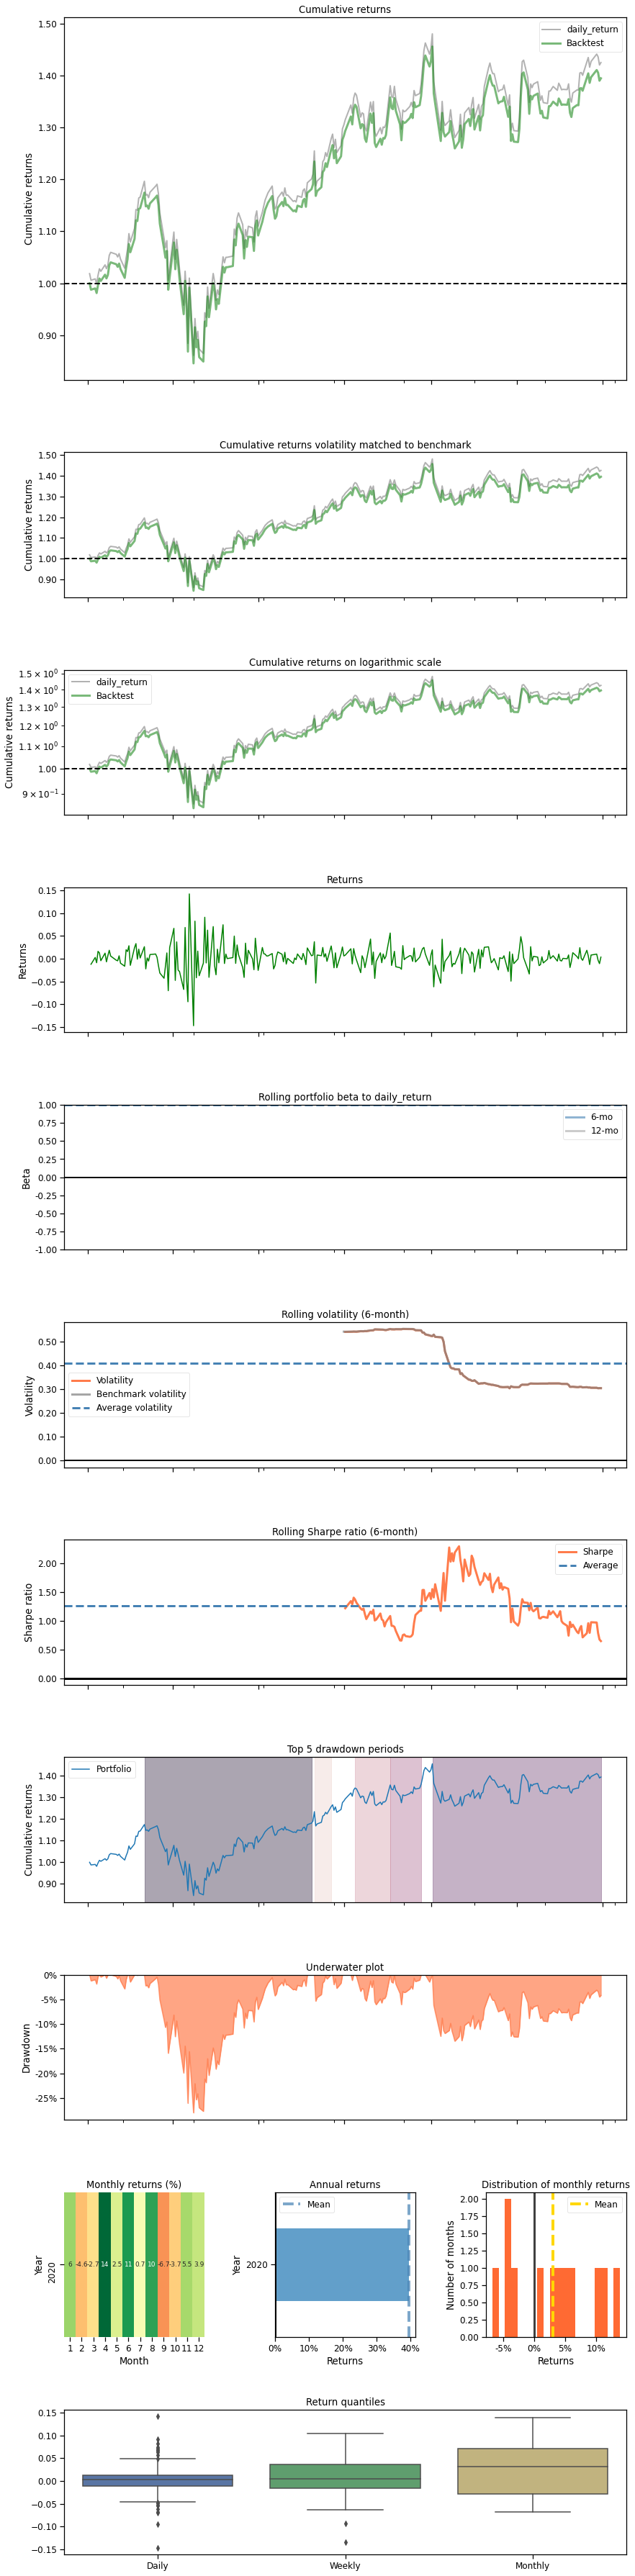

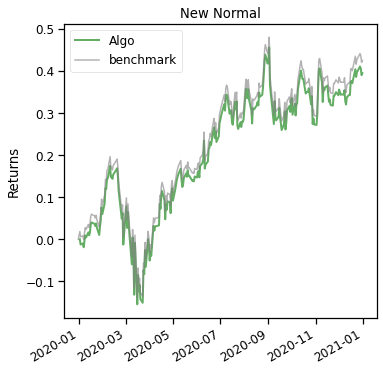

In [127]:
print(f"==============Compare to {stock} itself buy-and-hold===========")
%matplotlib inline
backtest_plot(account_value=df_account_value, 
             baseline_ticker = stock,
             baseline_start = '2020-01-01',
             baseline_end = '2021-01-01')

In [112]:
pd.set_option('display.max_rows', None)
df_actions

,date,actions
0,2020-01-02,[627]
1,2020-01-03,[0]
2,2020-01-06,[0]
3,2020-01-07,[0]
4,2020-01-08,[0]
5,2020-01-09,[0]
6,2020-01-10,[0]
7,2020-01-13,[0]
8,2020-01-14,[0]
9,2020-01-15,[0]


In [19]:
trained_ppo.save('trained_models/2009-2019_MSFT_2021_4_24_ppo.model')